# COVID-19 Machine Learning Dataset®

>Adopted from the dataset provided by Dr. Karandeep Singh [@kdpsinghlab](https://twitter.com/kdpsinghlab/status/1239416911668092928)

The goal of this case study (intended for education) is to **predict the urgency** with which a COVID-19 patient will need to be admitted to the hospital from the time of onset of symptoms.

The original dataset is located on this [github repo](https://github.com/ml4lhs/covid19_ml_education/raw/master/covid_ml.csv). Please note that this dataset has been simplified for this case study

The raw data comes from the following [source](http://virological.org/t/epidemiological-data-from-the-ncov-2019-outbreak-early-descriptions-from-publicly-available-data/337).

**Primary predictors:**
- age (if an age range was provided in the source data, only the first number is used)
- sex
- cough, fever, chills, sore_throat, headache, fatigue (all derived from the symptoms column using regular expressions)

>The goal of the exercise is to make a classification model to predict the **urgency_of_admission** based on the following criteria
1. 0-1 days from onset of symptoms to admission => High
2. 2+ days from onset of symptoms to admission *or* no admission => Low
  

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score


## Calling the dataset
>We are using a modified dataset found here [covid_19 dataset source](https://web.us.edusercontent.com/hulb749ekf8a0pncvj99orb78k)

The following changes were made:
1. Categorical values changed to 1 and 0
2. SMOTE used to upsample in order to balance the dataset. 

In [2]:
df = pd.read_csv('covid_data.csv')
df.head(5), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          1252 non-null   int64
 1   sex          1252 non-null   int64
 2   cough        1252 non-null   int64
 3   fever        1252 non-null   int64
 4   chills       1252 non-null   int64
 5   sore_throat  1252 non-null   int64
 6   headache     1252 non-null   int64
 7   fatigue      1252 non-null   int64
 8   Urgency      1252 non-null   int64
dtypes: int64(9)
memory usage: 88.2 KB


(   age  sex  cough  fever  chills  sore_throat  headache  fatigue  Urgency
 0   30    1      0      0       0            0         0        0        0
 1   47    1      0      0       0            0         0        0        0
 2   49    1      0      0       0            0         0        0        0
 3   50    0      0      0       0            0         0        0        0
 4   59    0      0      1       0            0         0        0        0,
 None)

In [ ]:
# define X_train, y_train, X_test, and y_test 
# Urgency is the response variable, all other variables are the predictors                        
X = df[['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']]
y = df['Urgency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## GridsearchCV for Logistic Regression
> Perform a hyper-parameter search to get the best C value for Logistic Regression using [GridsearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
>> For simplicity, use **accuracy** as the metric to choose best hyper-parameter


In [4]:
parameters = [{'C': [0.01, 0.1, 1, 10, 100]}]
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

grid_search = GridSearchCV(estimator = log_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search.fit(X_train, y_train) 

best_C = grid_search.best_params_['C']
best_accuracy = grid_search.best_score_
best_model = grid_search.best_estimator_
best_C, best_accuracy, best_model

(0.1,
 0.6303383084577114,
 LogisticRegression(C=0.1, max_iter=1000, solver='liblinear'))

### Fitting the data and making predictions


In [5]:
logreg = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [6]:
# Compute the accuracy of the model
logistic_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", logistic_acc)

Logistic Regression Accuracy: 0.6055776892430279


## GridsearchCV for KNN classification
> Perform a hyper-parameter search to get the best k value for KNN Classification using [GridsearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
>> For simplicity, use **accuracy** as the metric to choose best hyper-parameter


In [7]:
parameters = [{'n_neighbors':list(range(1, 20))}]
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search.fit(X_train, y_train) 

best_k = grid_search.best_params_['n_neighbors']
best_knn_accuracy = grid_search.best_score_

best_k, best_knn_accuracy

(12, 0.6374427860696518)

### Fitting the data and making predictions


In [8]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [9]:
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_acc

0.6693227091633466

## Confusion Matrix

In [10]:
cm_logreg = confusion_matrix(y_test, y_pred)
cm_logreg

array([[61, 74],
       [25, 91]])

In [11]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[94, 41],
       [42, 74]])

### Plot the Confusion Matrix

Plot the Confusion Matrix for each of the above models as a heatmap.


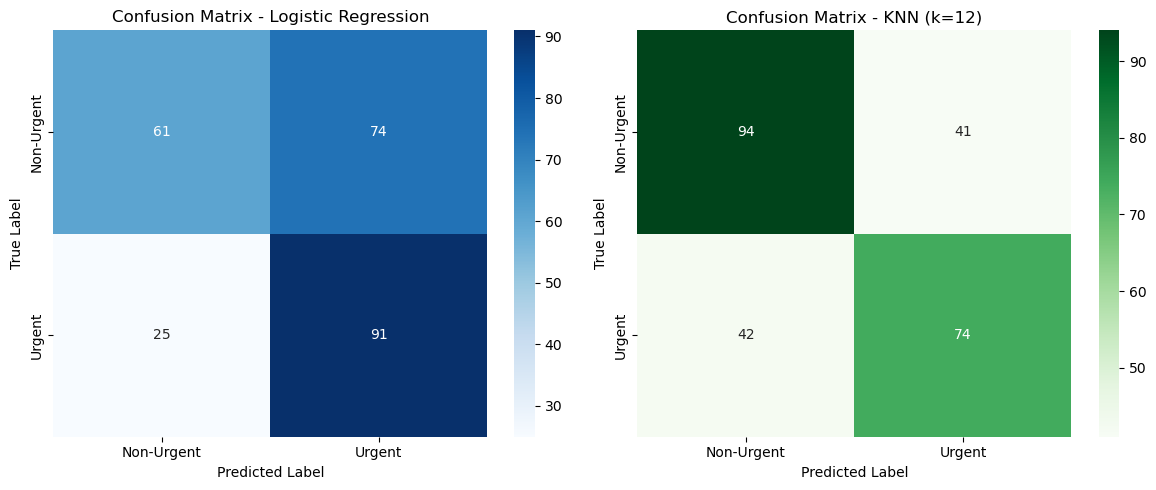

In [ ]:
# Plot of the Confusion Matrix for the Logisitic Regression and kNN Classification model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Urgent", "Urgent"], yticklabels=["Non-Urgent", "Urgent"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")

plt.subplot(1, 2, 2)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Urgent", "Urgent"], yticklabels=["Non-Urgent", "Urgent"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN (k=12)")

plt.tight_layout()
plt.show()

## **Sensitivity**

The **Sensitivity**, also known as **Recall** or **True Positive Rate(TPR)**


$$TPR = Recall = \frac{TP}{OP} = \frac{TP}{TP+FN},$$

also called the **Hit Rate**: the fraction of observed positives (1s) the classifier gets right, or how many true positives were recalled. Maximizing the recall towards 1 means keeping down the false negative rate

In [14]:
# Compute the Sensitivity for the Logistic Regression model
logistic_recall = recall_score(y_test, y_pred)

# Compute the Sensitivity for the kNN Classification model
knn_recall = recall_score(y_test, y_pred_knn)

## **Specificity**
The **Specificity** or **True Negative Rate** is defined as

$$TNR = \frac{TN}{ON} = \frac{TN}{FP+TN}$$

In [15]:
# Compute the Specificity for the Logistic Regression model
logistic_fpr = cm_logreg[0, 1] / (cm_logreg[0, 1] + cm_logreg[0, 0])

# Compute the Specificity for the kNN Classification model
knn_fpr = cm_knn[0, 1] / (cm_knn[0, 1] + cm_knn[0, 0])


## **Precision** (Positive Predicted Value)

**Precision**,tells you how many of the predicted positive(1) hits were truly positive

$$Precision = \frac{TP}{PP} = \frac{TP}{TP+FP}.$$

In [16]:
# Compute the Precision for the Logistic Regression model
logistic_precision = precision_score(y_test, y_pred)

# Compute the Precision for the kNN Classification model
knn_precision = precision_score(y_test, y_pred_knn)


## **F1 score**
**F1** score gives us the Harmonic Mean of Precision and Recall.
It tries to minimize both **false positives** and **false negatives** simultaneously

$$F1 =  \frac{2*Recall*Precision}{Recall + Precision}$$

In [17]:
# Compute the F1-Score for the Logistic Regression model
logistic_fscore = f1_score(y_test, y_pred)

# Compute the F1-Score for the kNN Classification model
knn_fscore = f1_score(y_test, y_pred_knn)


In [18]:
# Helper code to bring everything together
pt = PrettyTable()

pt.field_names = ["Metric", "Logistic Regression", "kNN Classification"]
pt.add_row(["Accuracy", round(logistic_acc, 3), round(knn_acc, 3)])
pt.add_row(["Sensitivity(Recall)", round(logistic_recall, 3), round(knn_recall, 3)])
pt.add_row(["Specificity", round(logistic_fpr, 3), round(knn_fpr, 3)])
pt.add_row(["Precision", round(logistic_precision, 3), round(knn_precision, 3)])
pt.add_row(["F1 Score", round(logistic_fscore, 3), round(knn_fscore, 3)])

print(pt)


+---------------------+---------------------+--------------------+
|        Metric       | Logistic Regression | kNN Classification |
+---------------------+---------------------+--------------------+
|       Accuracy      |        0.606        |       0.669        |
| Sensitivity(Recall) |        0.784        |       0.638        |
|     Specificity     |        0.548        |       0.304        |
|      Precision      |        0.552        |       0.643        |
|       F1 Score      |        0.648        |       0.641        |
+---------------------+---------------------+--------------------+


## Bayes Theorem & Diagnostic testing

In [19]:
# Compute the area under the ROC curve for the Logistic Regression model
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Compute the area under the ROC curve for the kNN Classification model
knnreg_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

logreg_auc, knnreg_auc

(0.6232758620689655, 0.7413793103448277)

## ROC Curve

To make a ROC curve you plot the True Positive Rate, against the False Positive Rate,

The curve is actually a 3 dimensional plot, which each point representing a different value of threshold.


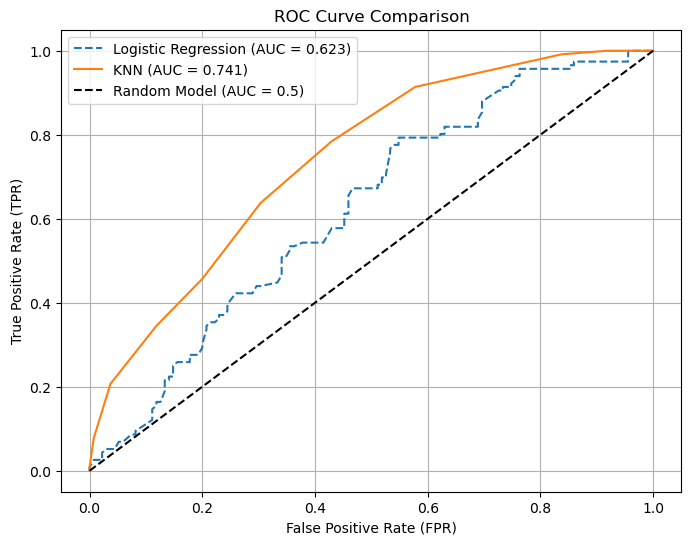

In [ ]:
# Plot the ROC curve for the Logistic Regression model and kNN Classification model
# You can refer to the end of homework 5 for example code

# Compute ROC curve for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

# Compute ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {logreg_auc:.3f})", linestyle='--')
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {knnreg_auc:.3f})", linestyle='-')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Model (AUC = 0.5)")

# Labels and title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()

# Show plot
plt.show()

# Which classifier to choose?

## Choice of classifier Scenario 1 - BRAZIL
**The new variant of the Covid-19 virus is contagious and is infecting many Brazilians**

Brazilian officials however dictate that hospitals do not classify a large number of people at 'high' risk to avoid bad press and subsequent political global backlash

In numbers we need the best classifier with the following restriction:

$$TPR + FPR \le 0.5$$     


## Choice of classifier Scenario 2 - GERMANY

**It's the month of February, and Germany, is now aware that the pandemic of Covid-19 has severely hit Europe. Italy is already decimated and there is suspected spread to other European nations as well**

German officials have a clear target. The want the fatality ratio to be as less as possible. Thus, it is imperative to find cases in need of urgent attention and give them the best chance of survival.

In numbers we need the best classifier with the following restriction:

$$ 0.8 \ge TPR \le 0.85 $$

# Choice of classifier Scenario 3 - INDIA

**It's the month of May, and India, now severly impacted by Covid-19, has now run a major shortage of hospital beds for suspected cases**

Owing to exponentially rising cases Indian officials cannot afford many **False Positives** to be given hospital beds. Hence, it is dictated that hospitals do not classify a large number of people at 'high' risk to avoid bed shortage for **At risk** patients

India has only 1 million beds left, and there are already 2 million people suspected of having the disease. The officials need to work out a strategy to find the people at most need of urgent care.

In numbers we need the best classifier with the following restriction:

$$TP + FP = 1000000$$

$$TPR*OP + FPR*ON = 1000000$$

$$Assuming\ OP=ON = 500000$$

$$TPR + FPR \le 1 $$

## ROC curve with boundary conditions

Plot the ROC curve of the Logistic Regression model and kNN Classification model, along with the boundary conditions for each of the scenarios.

Each of the scenarios can be represented as a region governed by straight line(s) based on the given conditions.


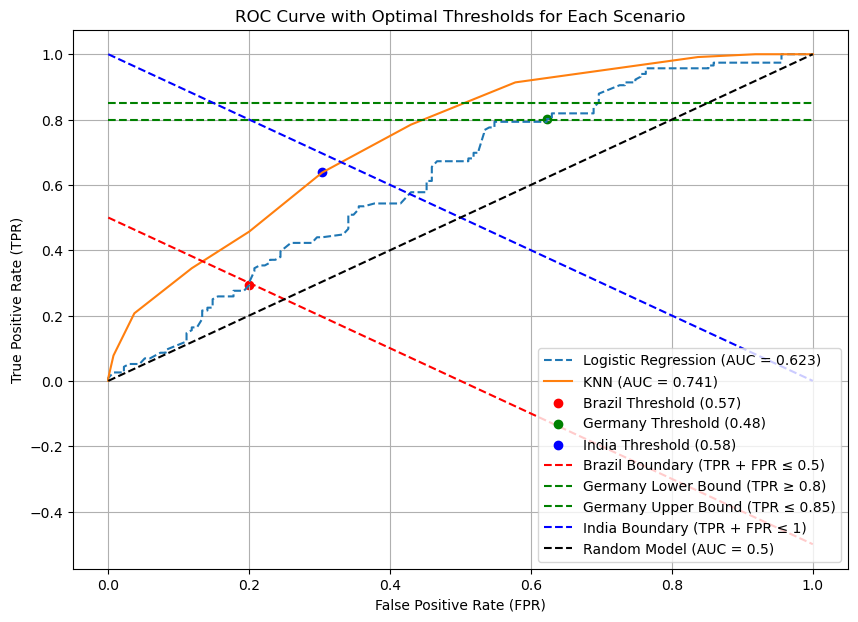

In [25]:
# Compute predicted probabilities for both models
logistic_probs = logreg.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve for different thresholds
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, logistic_probs)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_probs)

# Identify threshold points for each scenario

# Brazil: Find the threshold where TPR + FPR <= 0.5
x_brazil = np.linspace(0, 1, 100)
y_brazil = 0.5 - x_brazil
brazil_index = np.where((tpr_logistic + fpr_logistic) <= 0.5)[0][-1]
brazil_threshold = thresholds_logistic[brazil_index]

# Germany: Find the threshold where 0.8 <= TPR <= 0.85
x_germany = np.linspace(0, 1, 100)
y_germany_lower = np.full_like(x_germany, 0.8)
y_germany_upper = np.full_like(x_germany, 0.85)
germany_index = np.where((tpr_logistic >= 0.8) & (tpr_logistic <= 0.85))[0][0]
germany_threshold = thresholds_logistic[germany_index]

# India: Find the threshold where TPR + FPR <= 1
x_india = np.linspace(0, 1, 100)
y_india = 1 - x_india
india_index = np.where((tpr_knn + fpr_knn) <= 1)[0][-1]
india_threshold = thresholds_knn[india_index]

# Plot ROC Curves
plt.figure(figsize=(10, 7))

# Logistic Regression ROC curve
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {logreg_auc:.3f})", linestyle='--')

# KNN ROC curve
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {knnreg_auc:.3f})", linestyle='-')

# Brazil decision point
plt.scatter(fpr_logistic[brazil_index], tpr_logistic[brazil_index], color='red', marker='o', label=f"Brazil Threshold ({brazil_threshold:.2f})")

# Germany decision point
plt.scatter(fpr_logistic[germany_index], tpr_logistic[germany_index], color='green', marker='o', label=f"Germany Threshold ({germany_threshold:.2f})")

# India decision point
plt.scatter(fpr_knn[india_index], tpr_knn[india_index], color='blue', marker='o', label=f"India Threshold ({india_threshold:.2f})")

# Boundary lines
plt.plot(x_brazil, y_brazil, 'r--', label="Brazil Boundary (TPR + FPR ≤ 0.5)")
plt.plot(x_germany, y_germany_lower, 'g--', label="Germany Lower Bound (TPR ≥ 0.8)")
plt.plot(x_germany, y_germany_upper, 'g--', label="Germany Upper Bound (TPR ≤ 0.85)")
plt.plot(x_india, y_india, 'b--', label="India Boundary (TPR + FPR ≤ 1)")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Model (AUC = 0.5)")

# Labels and title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve with Optimal Thresholds for Each Scenario")
plt.legend(loc="lower right")
plt.grid()

# Show plot
plt.show()


🔴 Brazil:

The red dot represents the point where TPR + FPR ≤ 0.5.
Since Brazil wants fewer urgent classifications, this threshold ensures fewer false positives.

🟢 Germany:

The green dot represents the point where 0.8 ≤ TPR ≤ 0.85.
This ensures enough true urgent cases are detected, reducing fatalities.

🔵 India:

The blue dot represents the point where TPR + FPR ≤ 1.
Since India has a hospital bed crisis, this threshold ensures a controlled number of urgent cases.